## Chapter 6 학습 관련 기술들

### 6.1 매개변수 갱신

+ 신경망 학습의 목적 : 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것
+ 매개변수의 최적값을 찾는 문제 = 최적화(optimization)


#### 6.1.2 확률적 경사 하강법(SGD)

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]

#### 6.1.3 SGD의 단점
+ 비등방성 함수(anisotropy, 방향에 따라 성질(기울기)가 달라지는 함수)에서는 탐색 경로가 비효율적

#### 6.1.4 모멘텀

In [2]:
import numpy as np

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.key():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

#### 6.1.5 AdaGrad

In [1]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.2 가중치의 초깃값

#### 6.2.2 은닉층의 활성화값 분포

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장
activations1 = {}
activations2 = {}
activations2_1 = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    w1 = np.random.randn(node_num, node_num) * 0.01
    w2 = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)
    a1 = np.dot(x, w1)
    a2 = np.dot(x, w2)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    z1 = sigmoid(a1)
    z2 = sigmoid(a2)
    z2_1 = tanh(a2)

    activations[i] = z
    activations1[i] = z1
    activations2[i] = z2
    activations2_1[i] = z2_1

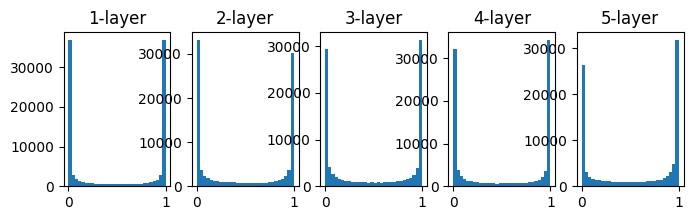

In [15]:
# 히스토그램 그리기
plt.figure(figsize=(8,2))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

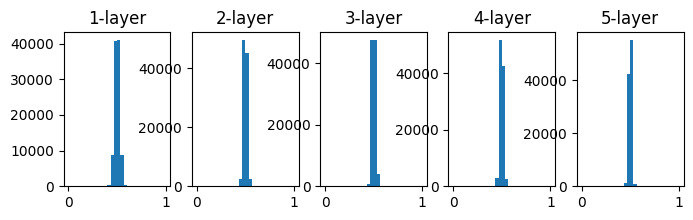

In [17]:
# 히스토그램 그리기
plt.figure(figsize=(8,2))
for i, a in activations1.items():
    plt.subplot(1, len(activations1), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

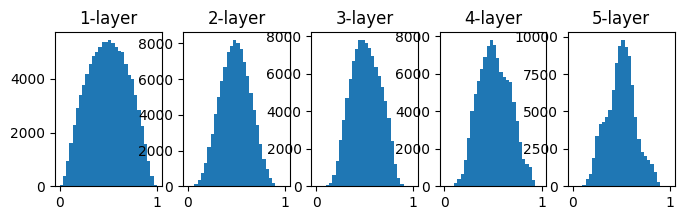

In [19]:
# 히스토그램 그리기
plt.figure(figsize=(8,2))
for i, a in activations2.items():
    plt.subplot(1, len(activations2), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

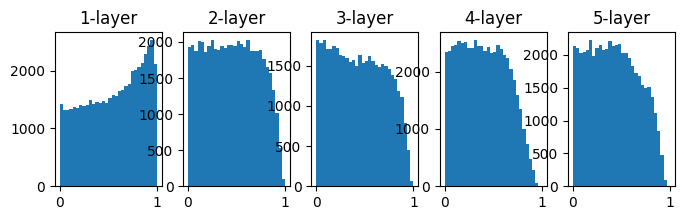

In [22]:
# 히스토그램 그리기
plt.figure(figsize=(8,2))
for i, a in activations2_1.items():
    plt.subplot(1, len(activations2_1), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3024472269851373
Xavier:2.312422179751795
He:2.3201700239786627
===========iteration:100===========
std=0.01:2.301855381756098
Xavier:2.274210804208478
He:1.761675530047818
===========iteration:200===========
std=0.01:2.302930938580475
Xavier:2.1655204415611133
He:1.0027785311523687
===========iteration:300===========
std=0.01:2.30540486156215
Xavier:2.0080932616398264
He:0.6837370152123562
===========iteration:400===========
std=0.01:2.30113558452442
Xavier:1.5784955685764768
He:0.4198917568876097
===========iteration:500===========
std=0.01:2.304189423108833
Xavier:1.068259617048227
He:0.30430366884024995
===========iteration:600===========
std=0.01:2.302133724852257
Xavier:0.9359682044119503
He:0.36638853714443176
===========iteration:700===========
std=0.01:2.2983955522566673
Xavier:0.6571919272359013
He:0.38747529009009235
===========iteration:800===========
std=0.01:2.3076597449721294
Xavier:0.5262865056654289
He:0.2619965912881123
===

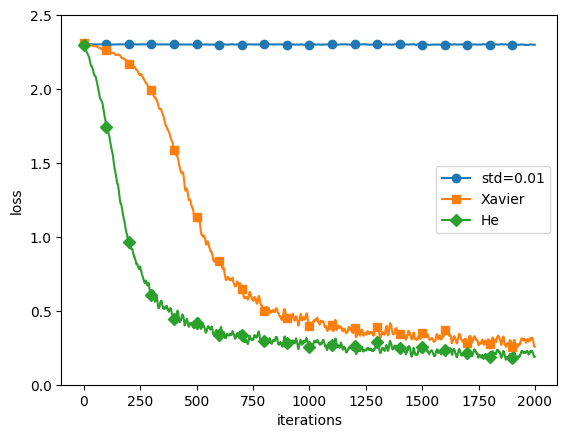

In [24]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 6.3 배치 정규화
#### 6.3.2 배치 정규화의 효과

============== 1/16 ==============
epoch:0 | 0.117 - 0.122


/Users/nozerose/2023_AI_Study/Team5/김대욱/Deep_Learning_from_Scratch/ch06/../common/multi_layer_net_extend.py:103: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/nozerose/2023_AI_Study/Team5/김대욱/Deep_Learning_from_Scratch/ch06/../common/multi_layer_net_extend.py:103: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/nozerose/2023_AI_Study/Team5/김대욱/Deep_Learning_from_Scratch/ch06/../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.12
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.133
epoch:4 | 0.097 - 0.153
epoch:5 | 0.097 - 0.171
epoch:6 | 0.097 - 0.197
epoch:7 | 0.097 - 0.22
epoch:8 | 0.097 - 0.232
epoch:9 | 0.097 - 0.253
epoch:10 | 0.097 - 0.264
epoch:11 | 0.097 - 0.294
epoch:12 | 0.097 - 0.308
epoch:13 | 0.097 - 0.335
epoch:14 | 0.097 - 0.348
epoch:15 | 0.097 - 0.358
epoch:16 | 0.097 - 0.376
epoch:17 | 0.097 - 0.394
epoch:18 | 0.097 - 0.401


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.42
============== 2/16 ==============
epoch:0 | 0.116 - 0.09
epoch:1 | 0.097 - 0.12
epoch:2 | 0.097 - 0.138
epoch:3 | 0.097 - 0.162
epoch:4 | 0.097 - 0.19
epoch:5 | 0.097 - 0.212
epoch:6 | 0.097 - 0.235
epoch:7 | 0.097 - 0.259
epoch:8 | 0.097 - 0.275
epoch:9 | 0.097 - 0.296
epoch:10 | 0.097 - 0.31
epoch:11 | 0.097 - 0.33
epoch:12 | 0.097 - 0.363
epoch:13 | 0.097 - 0.372
epoch:14 | 0.097 - 0.381
epoch:15 | 0.097 - 0.393
epoch:16 | 0.097 - 0.402
epoch:17 | 0.097 - 0.428
epoch:18 | 0.097 - 0.436


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.448
============== 3/16 ==============
epoch:0 | 0.123 - 0.063
epoch:1 | 0.429 - 0.097
epoch:2 | 0.527 - 0.133
epoch:3 | 0.63 - 0.159
epoch:4 | 0.691 - 0.178
epoch:5 | 0.74 - 0.217
epoch:6 | 0.789 - 0.253
epoch:7 | 0.837 - 0.289
epoch:8 | 0.865 - 0.332
epoch:9 | 0.891 - 0.365
epoch:10 | 0.906 - 0.406
epoch:11 | 0.93 - 0.436
epoch:12 | 0.95 - 0.457
epoch:13 | 0.962 - 0.479
epoch:14 | 0.969 - 0.501
epoch:15 | 0.972 - 0.533
epoch:16 | 0.98 - 0.539
epoch:17 | 0.983 - 0.555
epoch:18 | 0.982 - 0.577


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.986 - 0.592
============== 4/16 ==============
epoch:0 | 0.086 - 0.083
epoch:1 | 0.274 - 0.1
epoch:2 | 0.426 - 0.199
epoch:3 | 0.519 - 0.253
epoch:4 | 0.585 - 0.318
epoch:5 | 0.634 - 0.368
epoch:6 | 0.691 - 0.424
epoch:7 | 0.72 - 0.464
epoch:8 | 0.745 - 0.491
epoch:9 | 0.751 - 0.516
epoch:10 | 0.773 - 0.553
epoch:11 | 0.79 - 0.585
epoch:12 | 0.809 - 0.617
epoch:13 | 0.819 - 0.65
epoch:14 | 0.826 - 0.668
epoch:15 | 0.845 - 0.69
epoch:16 | 0.853 - 0.7
epoch:17 | 0.861 - 0.719
epoch:18 | 0.877 - 0.743


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.872 - 0.755
============== 5/16 ==============
epoch:0 | 0.112 - 0.111
epoch:1 | 0.111 - 0.153
epoch:2 | 0.112 - 0.326
epoch:3 | 0.112 - 0.48
epoch:4 | 0.115 - 0.581
epoch:5 | 0.115 - 0.649
epoch:6 | 0.122 - 0.698
epoch:7 | 0.129 - 0.738
epoch:8 | 0.131 - 0.775
epoch:9 | 0.136 - 0.796
epoch:10 | 0.147 - 0.804
epoch:11 | 0.152 - 0.82
epoch:12 | 0.173 - 0.84
epoch:13 | 0.169 - 0.848
epoch:14 | 0.19 - 0.862
epoch:15 | 0.203 - 0.869
epoch:16 | 0.213 - 0.884
epoch:17 | 0.227 - 0.889
epoch:18 | 0.243 - 0.895


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.258 - 0.903
============== 6/16 ==============
epoch:0 | 0.068 - 0.096
epoch:1 | 0.128 - 0.211
epoch:2 | 0.117 - 0.454
epoch:3 | 0.117 - 0.586
epoch:4 | 0.117 - 0.661
epoch:5 | 0.117 - 0.707
epoch:6 | 0.117 - 0.755
epoch:7 | 0.117 - 0.796
epoch:8 | 0.117 - 0.813
epoch:9 | 0.127 - 0.846
epoch:10 | 0.133 - 0.865
epoch:11 | 0.12 - 0.893
epoch:12 | 0.119 - 0.903
epoch:13 | 0.116 - 0.913
epoch:14 | 0.118 - 0.919
epoch:15 | 0.119 - 0.927
epoch:16 | 0.116 - 0.934
epoch:17 | 0.116 - 0.939
epoch:18 | 0.116 - 0.944


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.944
============== 7/16 ==============
epoch:0 | 0.105 - 0.11
epoch:1 | 0.167 - 0.305
epoch:2 | 0.116 - 0.598
epoch:3 | 0.117 - 0.694
epoch:4 | 0.117 - 0.758
epoch:5 | 0.116 - 0.797
epoch:6 | 0.117 - 0.833
epoch:7 | 0.117 - 0.867
epoch:8 | 0.117 - 0.896
epoch:9 | 0.117 - 0.913
epoch:10 | 0.117 - 0.931
epoch:11 | 0.117 - 0.944
epoch:12 | 0.117 - 0.959
epoch:13 | 0.117 - 0.964
epoch:14 | 0.117 - 0.975
epoch:15 | 0.117 - 0.98
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.983
epoch:18 | 0.117 - 0.987


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.988
============== 8/16 ==============
epoch:0 | 0.117 - 0.123
epoch:1 | 0.105 - 0.414
epoch:2 | 0.105 - 0.667
epoch:3 | 0.117 - 0.798
epoch:4 | 0.117 - 0.839
epoch:5 | 0.117 - 0.903
epoch:6 | 0.117 - 0.925
epoch:7 | 0.117 - 0.945
epoch:8 | 0.117 - 0.966
epoch:9 | 0.117 - 0.976
epoch:10 | 0.116 - 0.982
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.105 - 0.133
epoch:1 | 0.117 - 0.539
epoch:2 | 0.117 - 0.775
epoch:3 | 0.117 - 0.862
epoch:4 | 0.117 - 0.92
epoch:5 | 0.117 - 0.932
epoch:6 | 0.117 - 0.961
epoch:7 | 0.117 - 0.98
epoch:8 | 0.117 - 0.99
epoch:9 | 0.117 - 0.993
epoch:10 | 0.117 - 0.997
epoch:11 | 0.117 - 0.998
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.105
epoch:1 | 0.116 - 0.509
epoch:2 | 0.117 - 0.746
epoch:3 | 0.116 - 0.824
epoch:4 | 0.116 - 0.828
epoch:5 | 0.116 - 0.91
epoch:6 | 0.116 - 0.962
epoch:7 | 0.116 - 0.974
epoch:8 | 0.116 - 0.98
epoch:9 | 0.116 - 0.987
epoch:10 | 0.116 - 0.979
epoch:11 | 0.116 - 0.992
epoch:12 | 0.116 - 0.975
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.998
============== 11/16 ==============
epoch:0 | 0.099 - 0.105
epoch:1 | 0.117 - 0.57
epoch:2 | 0.117 - 0.554
epoch:3 | 0.117 - 0.631
epoch:4 | 0.117 - 0.697
epoch:5 | 0.117 - 0.729
epoch:6 | 0.116 - 0.735
epoch:7 | 0.117 - 0.693
epoch:8 | 0.117 - 0.799
epoch:9 | 0.117 - 0.842
epoch:10 | 0.117 - 0.896
epoch:11 | 0.117 - 0.873
epoch:12 | 0.117 - 0.888
epoch:13 | 0.117 - 0.901
epoch:14 | 0.117 - 0.904
epoch:15 | 0.117 - 0.871
epoch:16 | 0.117 - 0.893
epoch:17 | 0.117 - 0.883
epoch:18 | 0.117 - 0.898


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.908
============== 12/16 ==============
epoch:0 | 0.1 - 0.198
epoch:1 | 0.116 - 0.361
epoch:2 | 0.117 - 0.601
epoch:3 | 0.117 - 0.572
epoch:4 | 0.117 - 0.676
epoch:5 | 0.117 - 0.745
epoch:6 | 0.117 - 0.75
epoch:7 | 0.117 - 0.728
epoch:8 | 0.117 - 0.772
epoch:9 | 0.117 - 0.781
epoch:10 | 0.117 - 0.783
epoch:11 | 0.117 - 0.788
epoch:12 | 0.117 - 0.793
epoch:13 | 0.117 - 0.793
epoch:14 | 0.117 - 0.778
epoch:15 | 0.117 - 0.792
epoch:16 | 0.117 - 0.793
epoch:17 | 0.117 - 0.794
epoch:18 | 0.117 - 0.794


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.786
============== 13/16 ==============
epoch:0 | 0.117 - 0.146
epoch:1 | 0.117 - 0.443
epoch:2 | 0.117 - 0.638
epoch:3 | 0.117 - 0.625
epoch:4 | 0.117 - 0.649
epoch:5 | 0.117 - 0.675
epoch:6 | 0.117 - 0.687
epoch:7 | 0.117 - 0.674
epoch:8 | 0.117 - 0.688
epoch:9 | 0.116 - 0.69
epoch:10 | 0.116 - 0.651
epoch:11 | 0.116 - 0.694
epoch:12 | 0.116 - 0.701
epoch:13 | 0.116 - 0.7
epoch:14 | 0.116 - 0.7
epoch:15 | 0.116 - 0.704
epoch:16 | 0.116 - 0.709
epoch:17 | 0.116 - 0.718
epoch:18 | 0.116 - 0.706


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.702
============== 14/16 ==============
epoch:0 | 0.116 - 0.103
epoch:1 | 0.117 - 0.423
epoch:2 | 0.116 - 0.459
epoch:3 | 0.116 - 0.379
epoch:4 | 0.117 - 0.495
epoch:5 | 0.116 - 0.493
epoch:6 | 0.116 - 0.528
epoch:7 | 0.117 - 0.501
epoch:8 | 0.116 - 0.524
epoch:9 | 0.117 - 0.534
epoch:10 | 0.116 - 0.52
epoch:11 | 0.117 - 0.516
epoch:12 | 0.117 - 0.59
epoch:13 | 0.117 - 0.599
epoch:14 | 0.117 - 0.604
epoch:15 | 0.117 - 0.603
epoch:16 | 0.117 - 0.6
epoch:17 | 0.117 - 0.597
epoch:18 | 0.116 - 0.597


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.689
============== 15/16 ==============
epoch:0 | 0.1 - 0.189
epoch:1 | 0.117 - 0.021
epoch:2 | 0.117 - 0.277
epoch:3 | 0.116 - 0.277
epoch:4 | 0.116 - 0.405
epoch:5 | 0.116 - 0.488
epoch:6 | 0.116 - 0.465
epoch:7 | 0.117 - 0.469
epoch:8 | 0.116 - 0.502
epoch:9 | 0.116 - 0.504
epoch:10 | 0.116 - 0.51
epoch:11 | 0.117 - 0.503
epoch:12 | 0.117 - 0.516
epoch:13 | 0.116 - 0.459
epoch:14 | 0.116 - 0.509
epoch:15 | 0.116 - 0.517
epoch:16 | 0.116 - 0.505
epoch:17 | 0.116 - 0.479
epoch:18 | 0.116 - 0.582


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.551
============== 16/16 ==============
epoch:0 | 0.116 - 0.145
epoch:1 | 0.116 - 0.21
epoch:2 | 0.116 - 0.309
epoch:3 | 0.116 - 0.307
epoch:4 | 0.116 - 0.31
epoch:5 | 0.116 - 0.315
epoch:6 | 0.116 - 0.325
epoch:7 | 0.117 - 0.327
epoch:8 | 0.117 - 0.327
epoch:9 | 0.117 - 0.318
epoch:10 | 0.117 - 0.324
epoch:11 | 0.117 - 0.324
epoch:12 | 0.117 - 0.327
epoch:13 | 0.117 - 0.327
epoch:14 | 0.117 - 0.327
epoch:15 | 0.117 - 0.409
epoch:16 | 0.117 - 0.421
epoch:17 | 0.117 - 0.432
epoch:18 | 0.117 - 0.426
epoch:19 | 0.117 - 0.432


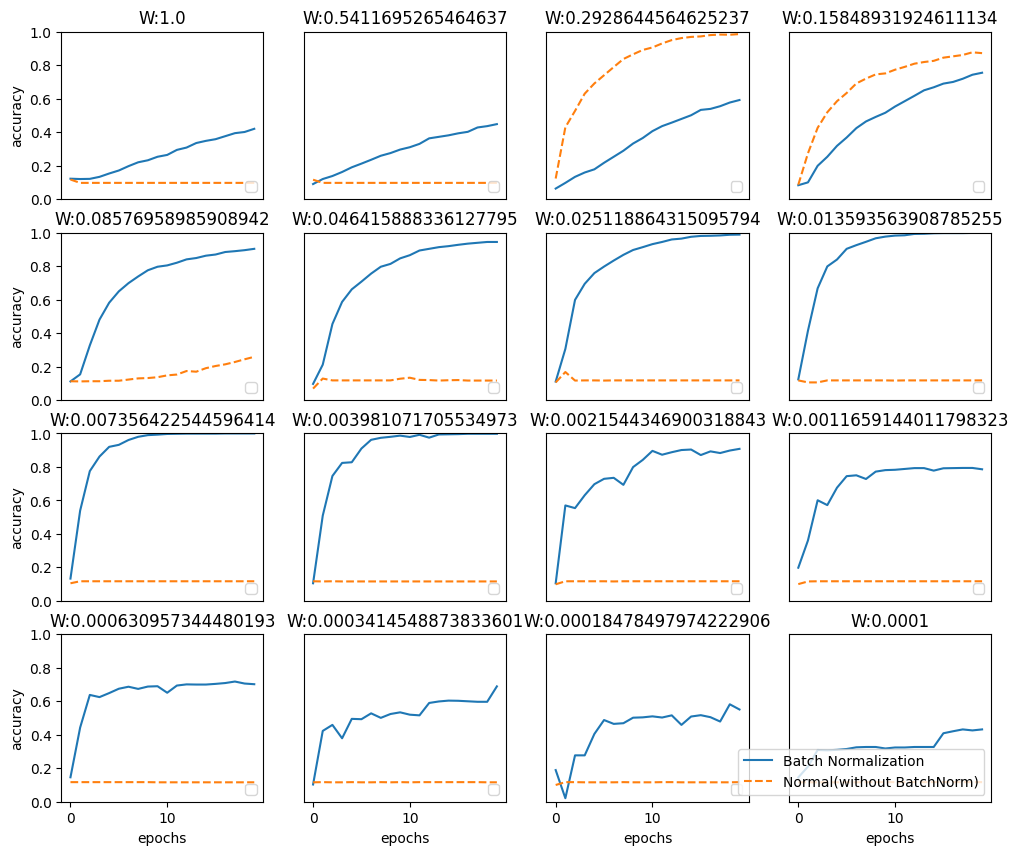

In [27]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

plt.figure(figsize=(12,10))

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

### 6.4 바른 학습을 위해
#### 6.4.1 오버피팅

epoch:0, train acc:0.10666666666666667, test acc:0.1129
epoch:1, train acc:0.11, test acc:0.1171
epoch:2, train acc:0.11666666666666667, test acc:0.1186
epoch:3, train acc:0.12, test acc:0.1229
epoch:4, train acc:0.13, test acc:0.1323
epoch:5, train acc:0.16666666666666666, test acc:0.1358
epoch:6, train acc:0.18333333333333332, test acc:0.1447
epoch:7, train acc:0.2, test acc:0.15
epoch:8, train acc:0.22, test acc:0.1547
epoch:9, train acc:0.25333333333333335, test acc:0.1676
epoch:10, train acc:0.26666666666666666, test acc:0.1786
epoch:11, train acc:0.3, test acc:0.1881
epoch:12, train acc:0.32, test acc:0.1964
epoch:13, train acc:0.35333333333333333, test acc:0.2114
epoch:14, train acc:0.36333333333333334, test acc:0.2257
epoch:15, train acc:0.37333333333333335, test acc:0.2396
epoch:16, train acc:0.4033333333333333, test acc:0.2521
epoch:17, train acc:0.42, test acc:0.2675
epoch:18, train acc:0.43333333333333335, test acc:0.2787
epoch:19, train acc:0.43666666666666665, test acc:0.

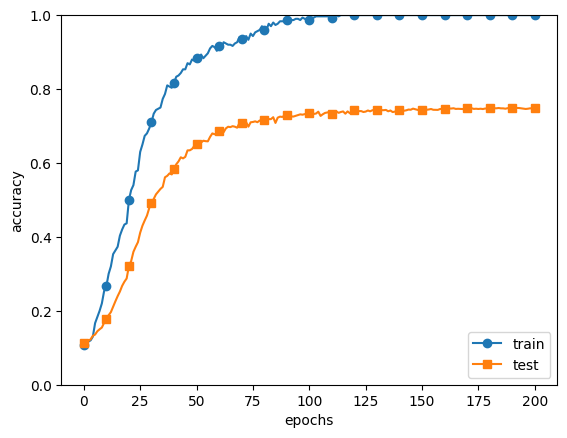

In [30]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#### 6.4.2 가중치 감소

epoch:0, train acc:0.06333333333333334, test acc:0.0779
epoch:1, train acc:0.08333333333333333, test acc:0.0808
epoch:2, train acc:0.08666666666666667, test acc:0.085
epoch:3, train acc:0.10666666666666667, test acc:0.0898
epoch:4, train acc:0.12666666666666668, test acc:0.0946
epoch:5, train acc:0.16333333333333333, test acc:0.1036
epoch:6, train acc:0.19333333333333333, test acc:0.1107
epoch:7, train acc:0.21333333333333335, test acc:0.124
epoch:8, train acc:0.24333333333333335, test acc:0.1385
epoch:9, train acc:0.2866666666666667, test acc:0.1489
epoch:10, train acc:0.30333333333333334, test acc:0.1602
epoch:11, train acc:0.31666666666666665, test acc:0.182
epoch:12, train acc:0.32666666666666666, test acc:0.1915
epoch:13, train acc:0.3333333333333333, test acc:0.197
epoch:14, train acc:0.35333333333333333, test acc:0.2151
epoch:15, train acc:0.37666666666666665, test acc:0.2322
epoch:16, train acc:0.39666666666666667, test acc:0.2537
epoch:17, train acc:0.43333333333333335, test a

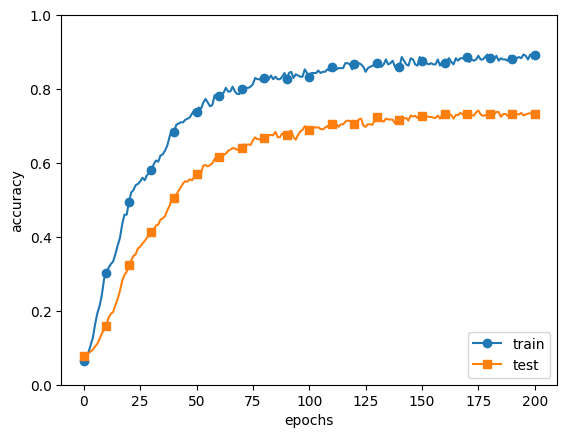

In [29]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#### 6.4.3 드롭아웃

In [31]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

train loss:2.272199238241263
=== epoch:1, train acc:0.10666666666666667, test acc:0.1065 ===
train loss:2.3010120605646947
train loss:2.3083074986954415
train loss:2.2955389148218774
=== epoch:2, train acc:0.11, test acc:0.1096 ===
train loss:2.279864674900936
train loss:2.2789623354783237
train loss:2.3108307813306483
=== epoch:3, train acc:0.11666666666666667, test acc:0.1129 ===
train loss:2.284776890493343
train loss:2.2670592343818132
train loss:2.2946083762705842
=== epoch:4, train acc:0.12333333333333334, test acc:0.1164 ===
train loss:2.2922514587944396
train loss:2.278029577559978
train loss:2.2934914513099485
=== epoch:5, train acc:0.12, test acc:0.1184 ===
train loss:2.2916825630204523
train loss:2.274328020844257
train loss:2.278120656958713
=== epoch:6, train acc:0.13, test acc:0.1213 ===
train loss:2.2877424862779354
train loss:2.282353809917374
train loss:2.275399981235455
=== epoch:7, train acc:0.12333333333333334, test acc:0.1233 ===
train loss:2.282563397892315
train 

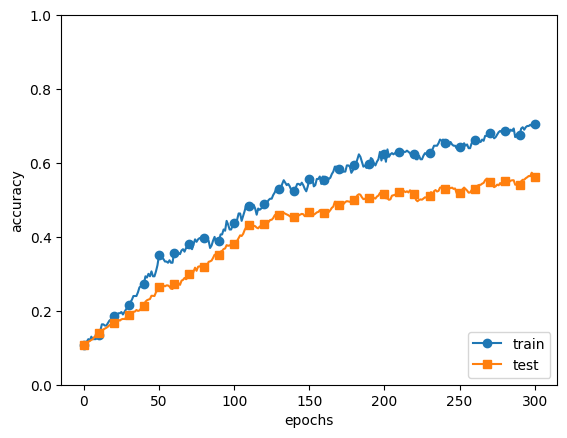

In [33]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.5 적절한 하이퍼파라미터 값 찾기

#### 6.5.1 검증 데이터

In [35]:
def shuffle_dataset(x, t):

    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.3 하이퍼파라미터 최적화 구현하기


val acc:0.09 | lr:0.0002735140331570335, weight decay:1.4165250612647919e-06
val acc:0.06 | lr:4.76707944222309e-06, weight decay:5.211033709301198e-06
val acc:0.18 | lr:0.0007494819660195079, weight decay:2.139788535477066e-07
val acc:0.21 | lr:0.0005724361013594912, weight decay:1.1362126862484815e-07
val acc:0.12 | lr:9.130613693197486e-06, weight decay:7.84155071471604e-06
val acc:0.4 | lr:0.003810540689288716, weight decay:3.662373546215043e-06
val acc:0.12 | lr:8.113368130037679e-06, weight decay:4.3127517884888705e-08
val acc:0.1 | lr:5.3910378098146065e-05, weight decay:6.983050122621644e-08
val acc:0.1 | lr:0.00012473231848154017, weight decay:8.12581808892037e-08
val acc:0.06 | lr:1.0574250456168077e-05, weight decay:6.649925929997442e-08
val acc:0.29 | lr:0.0009664089860430496, weight decay:6.475590449811837e-07
val acc:0.16 | lr:1.0965741845726396e-06, weight decay:8.209348603766191e-08
val acc:0.73 | lr:0.006502776048408609, weight decay:6.527532212276533e-05
val acc:0.18 

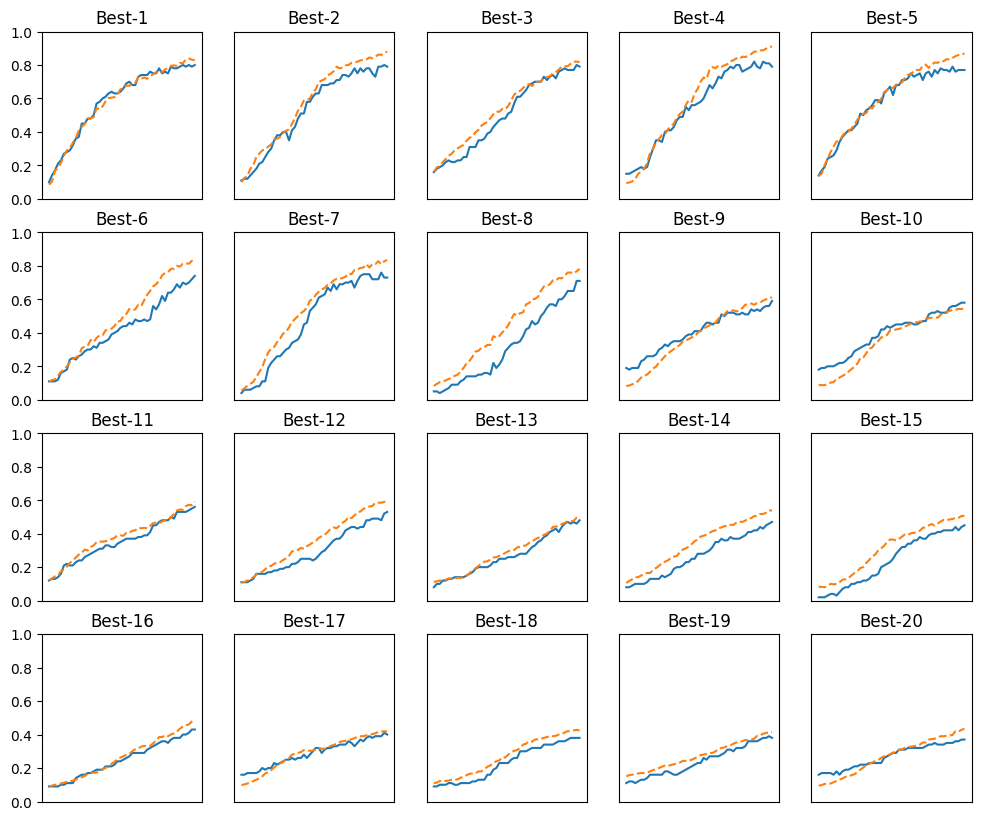

In [38]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

plt.figure(figsize=(12, 10))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()